## Install Modules

In [ ]:
# !pip3 install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
# !pip3 install detecto  
# !pip3 install labelImg

## Import Modules

In [3]:
from PIL import Image
import os
import matplotlib.pyplot as plt
from detecto import core, utils, visualize

## Format the Images

In [7]:
'''
def format_images(directory, size):
    for i, img in enumerate(os.listdir(directory)):
        im = Image.open(directory+img)
        im_resize = im.resize(size, Image.ANTIALIAS)
        im_resize.save(directory+str(i)+'.jpg')
        os.remove(directory+img)
        
'''        
from PIL import Image
import os

def format_images(directory, size):
    for i, img in enumerate(os.listdir(directory)):
        if img.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            im = Image.open(os.path.join(directory, img))
            im_resize = im.resize(size, Image.ANTIALIAS)
            im_resize.save(os.path.join(directory, str(i)+'.jpg'))
            os.remove(os.path.join(directory, img))


In [8]:
format_images('images/', (800, 600))

C:\Users\HP\AppData\Local\Temp\ipykernel_11332\3777273484.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im_resize = im.resize(size, Image.ANTIALIAS)


## Label the Images

In [13]:
# annotate the images
!labelImg

Image:D:\Notebooks\xyz\Deep-Learning-Projects\Face Mask Detection - Object Detection\images\3.jpg -> Annotation:D:/Notebooks/xyz/Deep-Learning-Projects/Face Mask Detection - Object Detection/images\3.xml

QMimeDatabase: Error loading internal MIME data
An error has been encountered at line 1 of <internal MIME data>: Premature end of document.:



Image:D:\Notebooks\xyz\Deep-Learning-Projects\Face Mask Detection - Object Detection\images\11.jpg -> Annotation:D:/Notebooks/xyz/Deep-Learning-Projects/Face Mask Detection - Object Detection/images\11.xml
Image:D:\Notebooks\xyz\Deep-Learning-Projects\Face Mask Detection - Object Detection\images\13.jpg -> Annotation:D:/Notebooks/xyz/Deep-Learning-Projects/Face Mask Detection - Object Detection/images\13.xml
Image:D:\Notebooks\xyz\Deep-Learning-Projects\Face Mask Detection - Object Detection\images\15.jpg -> Annotation:D:/Notebooks/xyz/Deep-Learning-Projects/Face Mask Detection - Object Detection/images\15.xml
Image:D:\Notebooks\xyz\Deep-Learning-Projects\Face Mask Detection - Object Detection\images\17.jpg -> Annotation:D:/Notebooks/xyz/Deep-Learning-Projects/Face Mask Detection - Object Detection/images\17.xml
Image:D:\Notebooks\xyz\Deep-Learning-Projects\Face Mask Detection - Object Detection\images\19.jpg -> Annotation:D:/Notebooks/xyz/Deep-Learning-Projects/Face Mask Detection - 

## Train the Model

In [14]:
dataset = core.Dataset('images/')
model = core.Model(['mask'])
model.fit(dataset)

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 11/11 [05:31<00:00, 30.13s/it]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 11/11 [05:05<00:00, 27.75s/it]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 11/11 [05:02<00:00, 27.53s/it]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 11/11 [04:58<00:00, 27.11s/it]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 11/11 [04:58<00:00, 27.10s/it]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 11/11 [05:05<00:00, 27.75s/it]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 11/11 [08:03<00:00, 43.93s/it]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 11/11 [05:56<00:00, 32.44s/it]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 11/11 [04:55<00:00, 26.85s/it]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 11/11 [04:43<00:00, 25.80s/it]


## Test the Model

['mask']
tensor([0.9862])


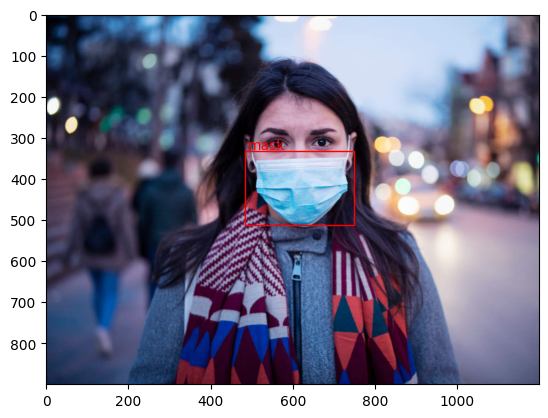

In [15]:
image = utils.read_image('test/test.jpg')
labels, boxes, scores = model.predict_top(image)
print(labels)
print(scores)
visualize.show_labeled_image(image, boxes, labels)

## Adding Augmentations

In [16]:
from torchvision import transforms
augmentations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform()
])

dataset = core.Dataset('images/', transform=augmentations)
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

model = core.Model(['mask'])

In [17]:
losses = model.fit(loader, epochs=10, learning_rate=0.001, lr_step_size=5, verbose=True)

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 6/6 [06:37<00:00, 66.32s/it]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 6/6 [05:50<00:00, 58.49s/it]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 6/6 [05:33<00:00, 55.53s/it]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 6/6 [04:18<00:00, 43.05s/it]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 6/6 [04:23<00:00, 43.87s/it]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 6/6 [04:06<00:00, 41.05s/it]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 6/6 [04:06<00:00, 41.14s/it]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 6/6 [04:15<00:00, 42.56s/it]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 6/6 [04:22<00:00, 43.68s/it]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 6/6 [04:06<00:00, 41.12s/it]


['mask']
tensor([0.8409])


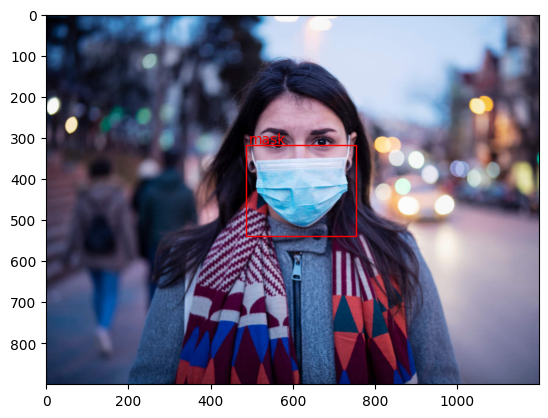

In [18]:
image = utils.read_image('test/test.jpg')
labels, boxes, scores = model.predict_top(image)
print(labels)
print(scores)
visualize.show_labeled_image(image, boxes, labels)

['mask']
tensor([0.8417])


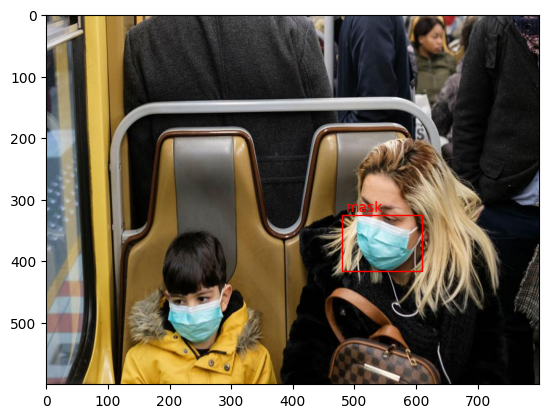

In [19]:
image = utils.read_image('test/test2.jpg')
labels, boxes, scores = model.predict_top(image)
print(labels)
print(scores)
visualize.show_labeled_image(image, boxes, labels)